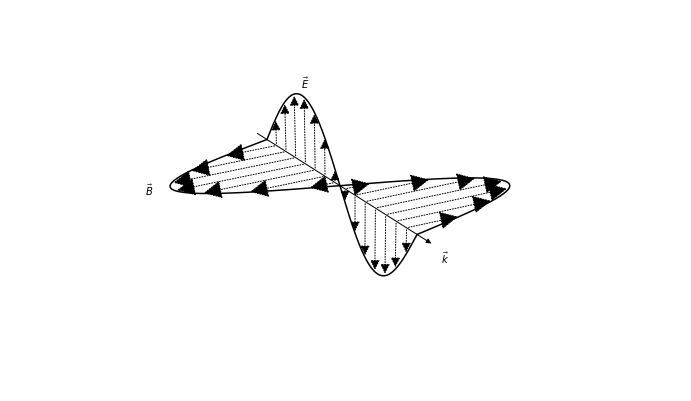

In [4]:
import scipy as sc 
import matplotlib.pyplot as plt 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# https://stackoverflow.com/questions/11140163/
# python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector/11156353#11156353

class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

# CREATE FIGURE OBJECT
fig = plt.figure()
fig.set_size_inches(12,7)
ax = fig.add_subplot(1,1,1,projection='3d')

# PLOT WAVE IN XY PLANE
x = sc.linspace(0,2*sc.pi,512)
y = sc.sin(x)
z = sc.zeros(x.size)
# plt.hold(True) - deprecated as of 2.0
ax.plot(x,-y,z,'k')
ax.plot(x,z,y,'k')

# PLOT THE E AND B VECTORS
xv = sc.linspace(0, 2*sc.pi, 16)
yv = sc.sin(xv)
zv = sc.zeros(xv.size)

for i in range(len(xv)):
	a = Arrow3D([xv[i], xv[i]], [0, -yv[i]], [0,0], mutation_scale=40, 
                lw=1, arrowstyle="-|>", ls="dotted", color="k")
	ax.add_artist(a)
	b = Arrow3D([xv[i], xv[i]], [0,0], [0,yv[i]], mutation_scale=20, 
                lw=1, arrowstyle="-|>", ls="dotted", color="k")
	ax.add_artist(b)

# PLOT THE K VECTOR
a = Arrow3D([-0.5, 2.2*sc.pi], [0,0], [0,0], mutation_scale=10, 
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)

# SET THE AXIS PROPERTIES
ax.set_xlim(0, 7.5)
ax.set_ylim(-1.2, 1.2)
ax.set_zlim(-1.2, 1.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.axis("off")

# SET THE CAMERA ANGLE FOR GOOD VISUALIZATION
ax.elev = 40
ax.azim = -30

# MARK THE VECTORS
ax.text(2.3*sc.pi, 0, -0.2, r'$\vec{k}$')
ax.text(sc.pi/2, -1.2, 0, r'$\vec{B}$' )
ax.text(sc.pi/2, 0, 1.1, r'$\vec{E}$' )

# SHOW THE PLOT
plt.show()




